In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [2]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [4]:
df.shape

(344, 5)

In [5]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [7]:
df['body_mass_g'].unique()

array([3750., 3800., 3250.,   nan, 3450., 3650., 3625., 4675., 3475.,
       4250., 3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400.,
       3600., 3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000.,
       4600., 3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350.,
       4100., 3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075.,
       2925., 3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275.,
       4475., 3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675.,
       5700., 5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000.,
       5050., 5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300.,
       4850., 5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925.,
       4975., 5500., 4575., 4375., 5750.])

In [8]:
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mode()[0])
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mode()[0])
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

In [9]:
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['sex']=lab.fit_transform(df['sex'])

In [11]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

In [12]:
from sklearn.cluster import KMeans
lst=[]
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(df)
    lst.append(data.inertia_)

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

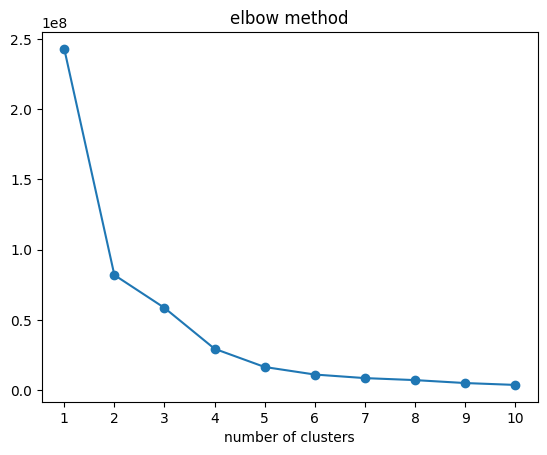

In [18]:
plt.plot(range(1,11),lst,marker='o')
plt.xticks(range(1,11))
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.plot


In [19]:
data2=KMeans(n_clusters=6,init='k-means++',random_state=42)
data2.fit(df)
y_pred=data2.predict(df)
y_pred

array([4, 4, 0, 4, 0, 4, 4, 1, 0, 2, 0, 4, 0, 4, 5, 4, 0, 5, 0, 5, 0, 4,
       4, 4, 4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 5, 4, 4, 0, 1, 0, 4, 0, 5,
       0, 1, 0, 0, 0, 5, 4, 5, 0, 5, 0, 4, 4, 4, 0, 4, 0, 5, 4, 5, 0, 4,
       0, 5, 0, 5, 4, 4, 4, 5, 4, 5, 4, 4, 4, 5, 0, 1, 4, 5, 0, 4, 4, 4,
       4, 4, 4, 5, 0, 5, 0, 5, 4, 5, 0, 5, 4, 1, 0, 5, 0, 4, 4, 4, 0, 1,
       4, 1, 0, 5, 4, 5, 0, 4, 0, 0, 0, 4, 0, 4, 0, 5, 0, 5, 0, 5, 0, 4,
       4, 5, 0, 4, 0, 4, 0, 5, 0, 0, 0, 4, 0, 4, 5, 0, 0, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 0, 4, 5, 4, 4, 4, 4, 5, 4, 5, 0, 4, 0, 5, 4, 0, 0, 4,
       0, 5, 0, 4, 4, 1, 0, 5, 0, 5, 4, 4, 4, 1, 0, 5, 4, 4, 4, 4, 4, 5,
       0, 5, 0, 4, 0, 4, 4, 5, 0, 0, 0, 5, 4, 4, 4, 4, 4, 5, 0, 4, 5, 4,
       5, 3, 5, 3, 3, 1, 1, 3, 5, 1, 1, 3, 1, 3, 5, 3, 5, 3, 1, 3, 3, 1,
       5, 1, 1, 1, 5, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 5, 3, 4, 3, 5, 1,
       3, 1, 5, 3, 1, 3, 1, 3, 5, 1, 1, 1, 5, 1, 5, 3, 5, 3, 5, 3, 1, 3,
       1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,

In [20]:
df['clusters']=y_pred
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,clusters
0,39.10000,18.70000,181.0,3750.0,2,4
1,39.50000,17.40000,186.0,3800.0,1,4
2,40.30000,18.00000,195.0,3250.0,1,0
3,43.92193,17.15117,190.0,3800.0,2,4
4,36.70000,19.30000,193.0,3450.0,1,0
...,...,...,...,...,...,...
339,43.92193,17.15117,190.0,3800.0,2,4
340,46.80000,14.30000,215.0,4850.0,1,1
341,50.40000,15.70000,222.0,5750.0,2,3
342,45.20000,14.80000,212.0,5200.0,1,3
